In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
df

,Line,Embryo,mem_pre,mem_post,cyt_pre,cyt_post
0,nwg206,E0,0.286353,0.315968,4.771853,4.627241
1,nwg206,E1,0.275037,0.312975,5.441677,5.361811
2,nwg206,E2,0.555835,0.476145,5.416454,5.316450
3,nwg206,E3,0.584536,0.622338,4.773552,4.705175
4,nwg206,E4,0.605869,0.680370,4.569767,4.499531
5,sv2061,E0,0.884846,2.785497,4.181006,3.211422
6,sv2061,E1,0.770779,2.308728,3.249833,2.428340
7,sv2061,E3,0.592297,2.455822,4.371298,3.388737
8,sv2061,E4,0.697751,2.474829,4.534357,3.671279
9,sv2061,E5,0.500685,2.402571,3.937900,3.057769


### Images

In [3]:
path_nwg206 = '/Users/blandt/Desktop/Data/Optogenetics/Optogenetics December 2021/Experiment/211217_nwg206_red60lp1000exp/E2'
path_sv2061 = '/Users/blandt/Desktop/Data/Optogenetics/Optogenetics December 2021/Experiment/211217_sv2061_red60lp1000exp/E0'


In [4]:
def func(path, ax, pre):
    if pre:
        img = load_image(path + '/Pre/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Pre/ROI_fit.txt')
    else:
        img = load_image(path + '/Post/rfp_channel_flat.tif')
        roi = np.loadtxt(path + '/Post/ROI_fit.txt')
        
    img_rotated = rotated_embryo(img, roi, 250, 180, 3)
    ax.imshow(img_rotated, cmap='gray', vmin=0, vmax=8)
    ax.axis('off')
    
# fig, ax = plt.subplots(2,2)
# func(path_nwg206, ax[0][0], True)
# func(path_nwg206, ax[0][1], False)
# func(path_sv2061, ax[1][0], True)
# func(path_sv2061, ax[1][1], False)
# fig.set_size_inches(4, 3)
# fig.tight_layout()
# fig.savefig('Figs/imgs_2x2.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


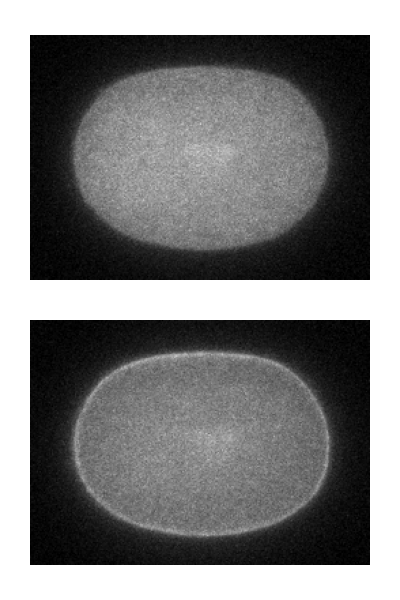

In [5]:
fig, ax = plt.subplots(2,1)
func(path_sv2061, ax[0], True)
func(path_sv2061, ax[1], False)
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/imgs_2x1.png', dpi=600, transparent=True)

### Conversion factor

In [6]:
c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
print(c)
print(np.mean(c))
print(np.std(c))

5     2.931796
6     3.069818
7     3.030224
8     2.791224
9     2.659582
10    2.956697
11    2.899000
12    2.776535
dtype: float64
2.8893596260583494
0.12941897673842578


### Concentrations

In [7]:
df_test = df[df.Line == 'sv2061']
df_ctrl = df[df.Line == 'nwg206']

<IPython.core.display.Javascript object>


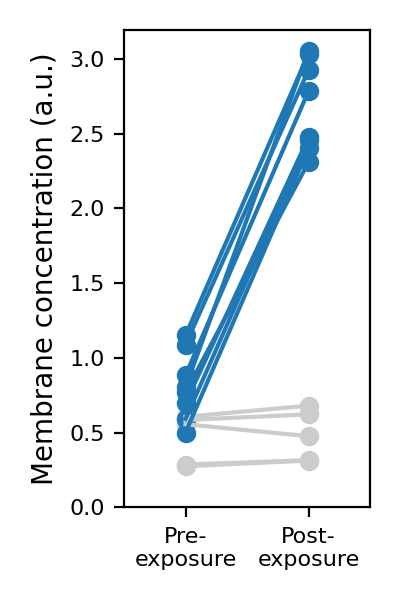

In [8]:
fig, ax = plt.subplots()
[ax.plot([1, 2], [x.mem_pre, x.mem_post], c='0.8') for _, x in df_ctrl.iterrows()];
[ax.scatter([1, 2], [x.mem_pre, x.mem_post], c='0.8') for _, x in df_ctrl.iterrows()];
[ax.plot([1, 2], [x.mem_pre, x.mem_post], c='tab:blue') for _, x in df_test.iterrows()];
[ax.scatter([1, 2], [x.mem_pre, x.mem_post], c='tab:blue') for _, x in df_test.iterrows()];
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-\nexposure', 'Post-\nexposure'], fontsize=8)
ax.set_xlim(0.5, 2.5)
ax.set_ylim(bottom=0)
ax.set_ylabel('Membrane concentration (a.u.)')
ax.tick_params(axis='y', labelsize=8)
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/membrane.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


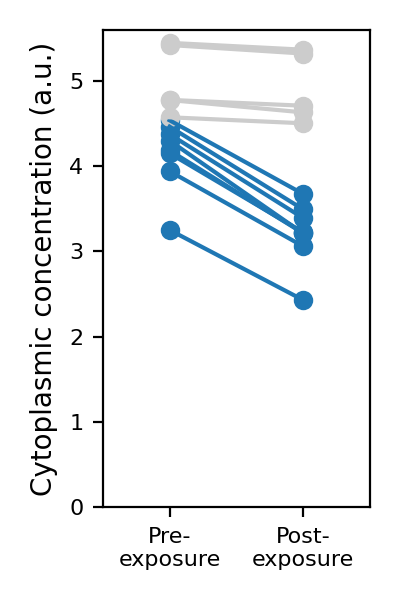

In [9]:
fig, ax = plt.subplots()
[ax.plot([1, 2], [x.cyt_pre, x.cyt_post], c='tab:blue') for _, x in df_test.iterrows()];
[ax.scatter([1, 2], [x.cyt_pre, x.cyt_post], c='tab:blue') for _, x in df_test.iterrows()];
[ax.plot([1, 2], [x.cyt_pre, x.cyt_post], c='0.8') for _, x in df_ctrl.iterrows()];
[ax.scatter([1, 2], [x.cyt_pre, x.cyt_post], c='0.8') for _, x in df_ctrl.iterrows()];
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-\nexposure', 'Post-\nexposure'], fontsize=8)
ax.set_xlim(0.5, 2.5)
ax.set_ylim(bottom=0)
ax.set_ylabel('Cytoplasmic concentration (a.u.)')
ax.tick_params(axis='y', labelsize=8)
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/cytoplasm.png', dpi=600, transparent=True)